In [6]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

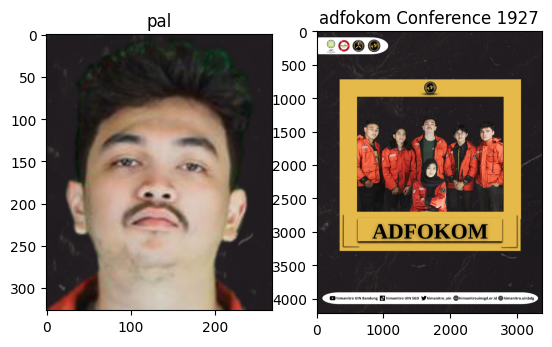

In [7]:
pal = cv2.imread('images/1Cropped.png')
pal = cv2.cvtColor(pal, cv2.COLOR_BGR2RGB) # simpan dengan nama yang sama = ditumpuk
# panggil dan konversi warna agar sesuai dengan Matplotlib
adfokom = cv2.imread('images/1.png')
adfokom = cv2.cvtColor(adfokom, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(pal), plt.title('pal')
plt.subplot(122),plt.imshow(adfokom), plt.title('adfokom Conference 1927')
plt.show()

In [8]:
img = cv2.imread('images/1.png',0)
img2 = img.copy()
template = cv2.imread('images/1Cropped.png',0)
w, h = template.shape[::-1]

In [9]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

hasil metode cv2.TM_CCOEFF : 


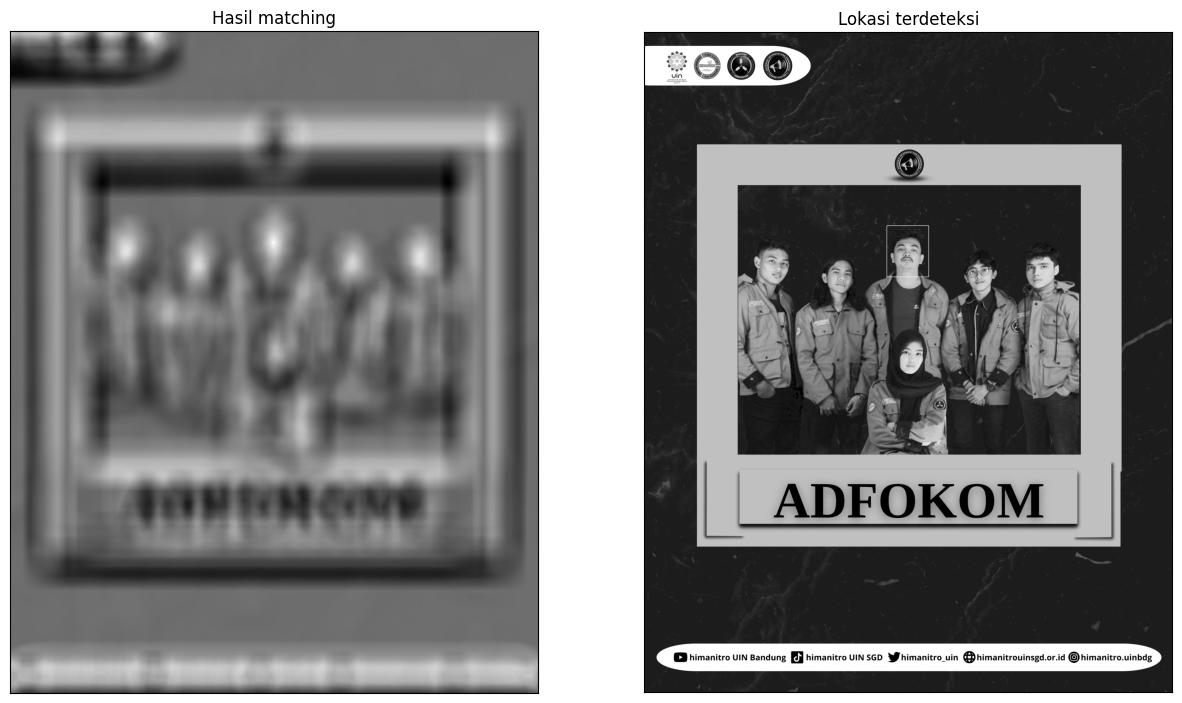

hasil metode cv2.TM_CCOEFF_NORMED : 


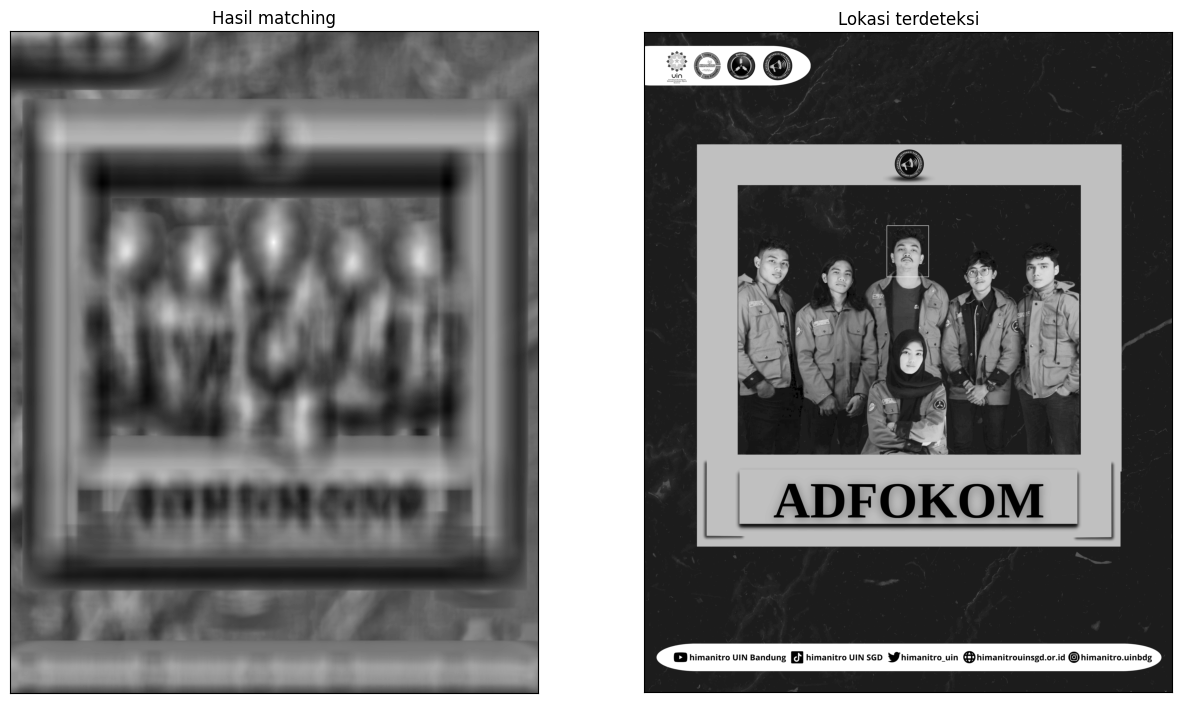

hasil metode cv2.TM_CCORR : 


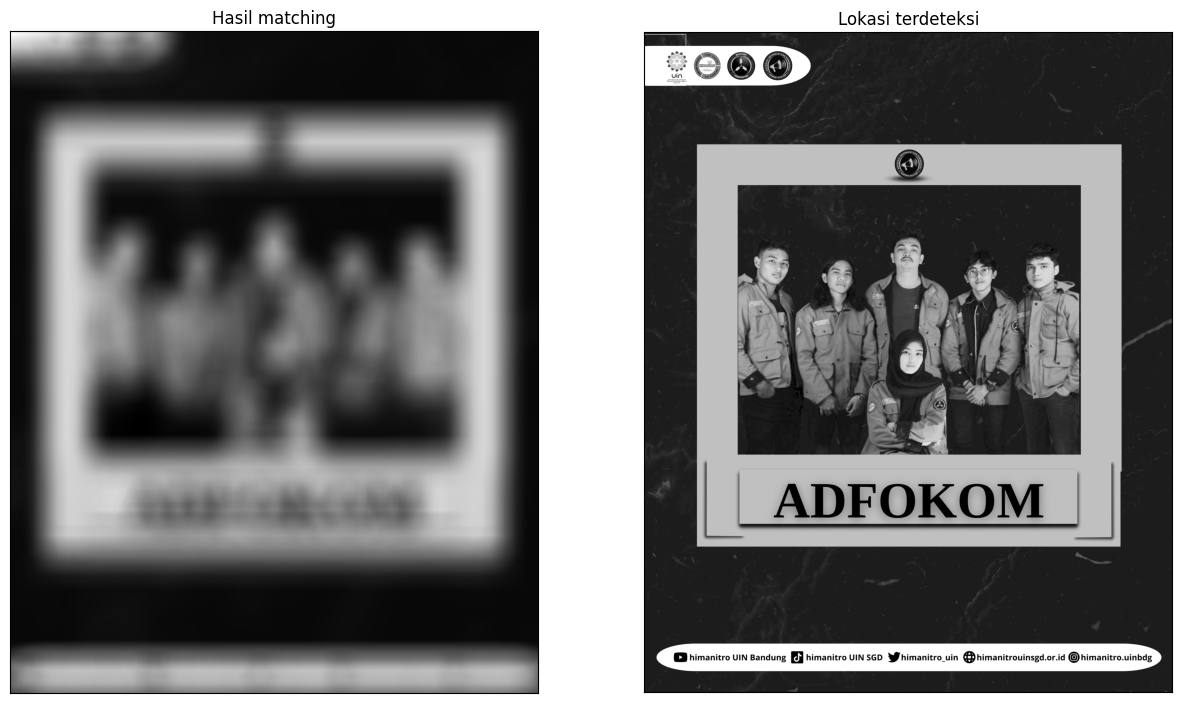

hasil metode cv2.TM_CCORR_NORMED : 


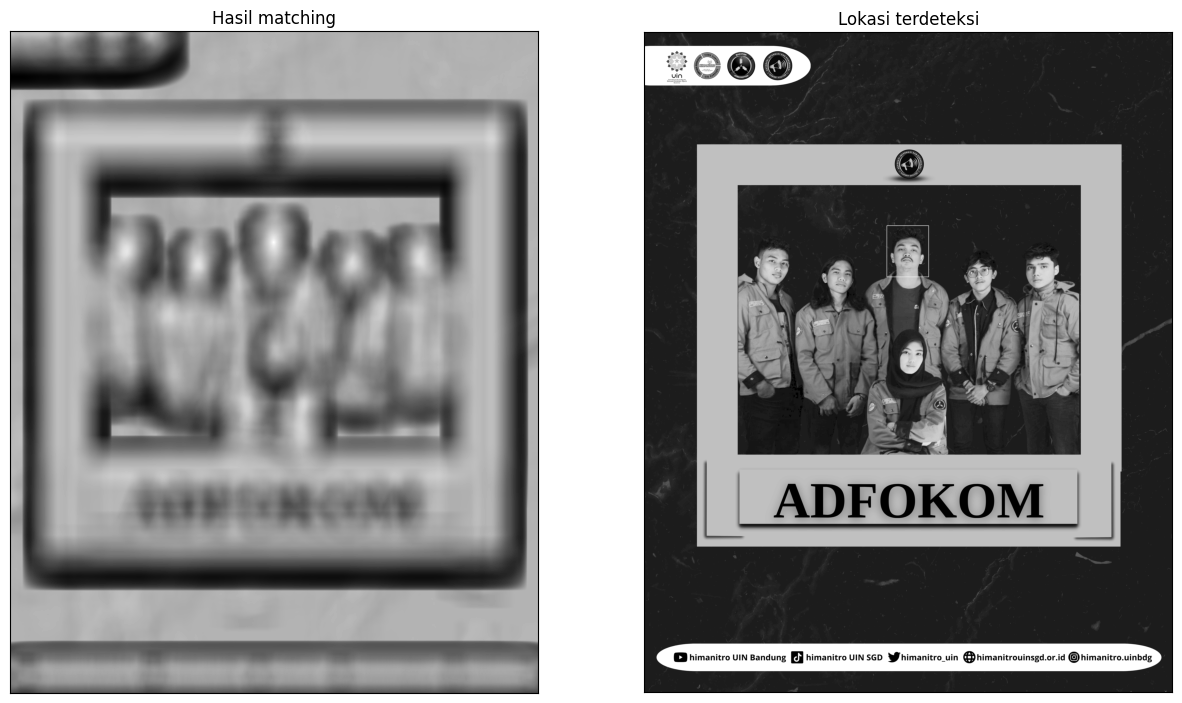

hasil metode cv2.TM_SQDIFF : 


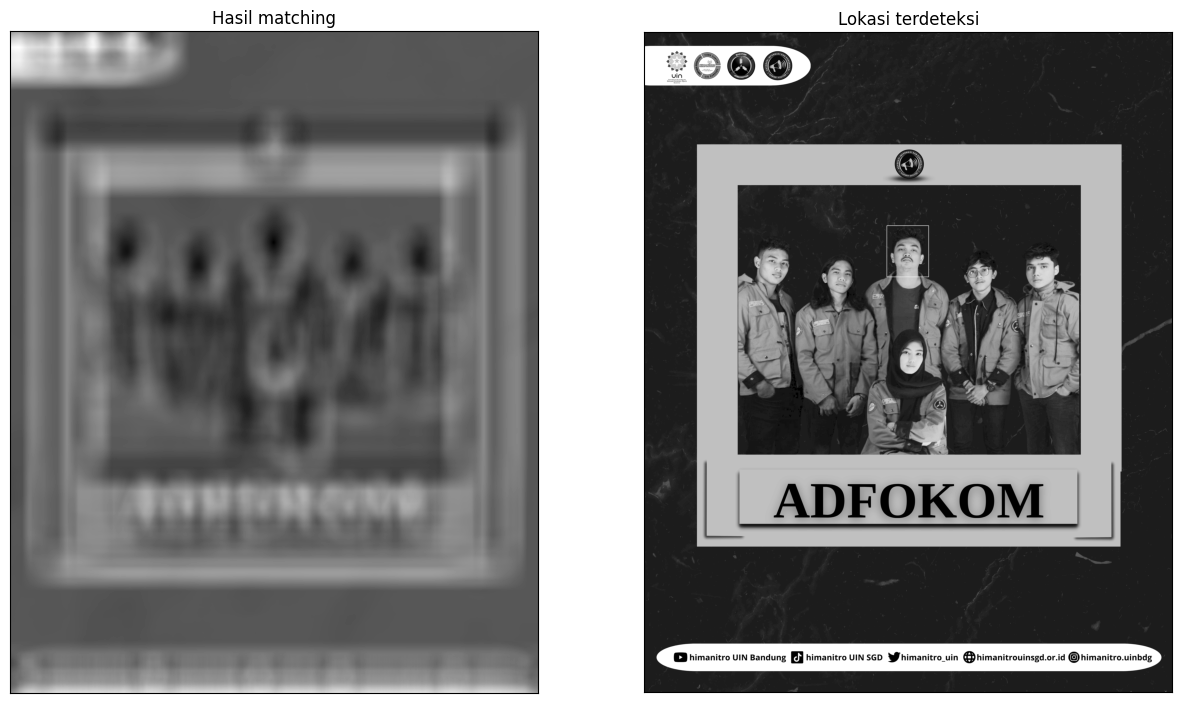

hasil metode cv2.TM_SQDIFF_NORMED : 


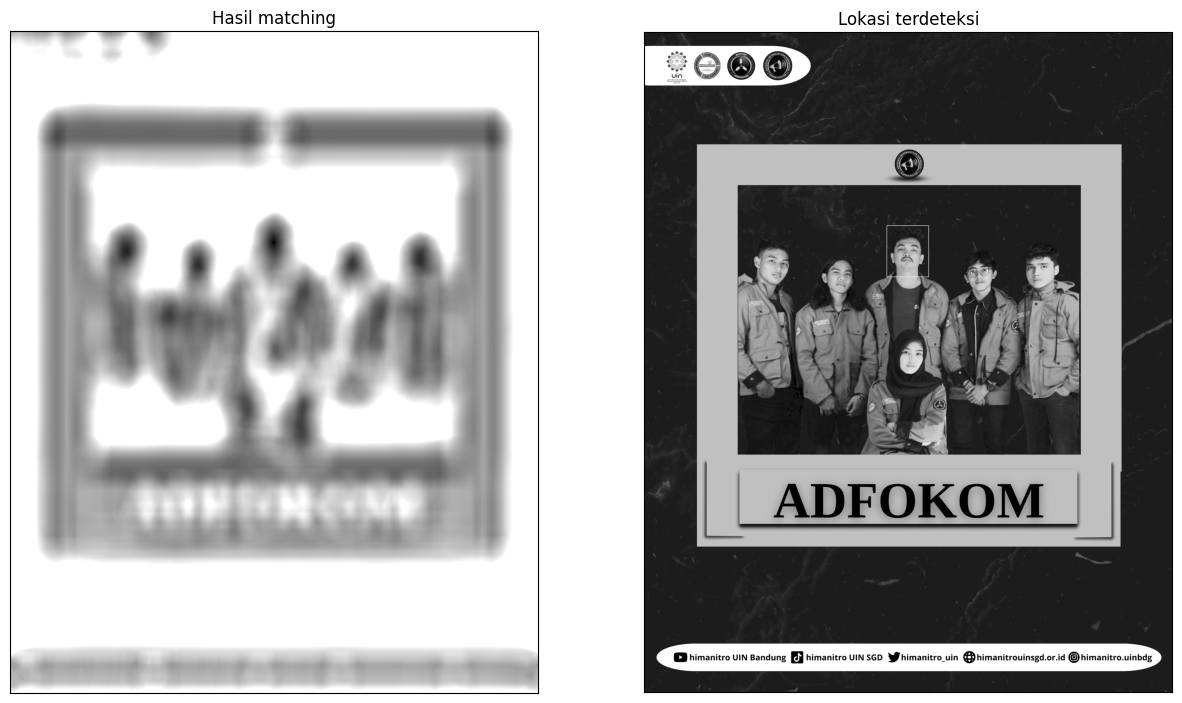

In [12]:
plt.rcParams["figure.figsize"] = (15,15)
for met in methods:
    img = img2.copy()
    method = eval(met)
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img, top_left, bottom_right, 255, 2) # 2 adalah ketebalan garis kotak
    print("hasil metode", met, ": " )
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Hasil matching'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Lokasi terdeteksi'), plt.xticks([]), plt.yticks([])

    plt.show()